<a href="https://colab.research.google.com/github/goudaChees/MLstudy/blob/master/0627(clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
heart_disease = pd.read_csv('/content/drive/MyDrive/code/02.notebook/heart_disease_cleveland_con.csv')

In [ ]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [ ]:
heart_disease.iloc[:, 0:5] = normalize(heart_disease.iloc[:, 0:5], norm='l2')

In [ ]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,0.197466,0.454485,0.730310,0.470156,0.007209,0
1,0.190612,0.455194,0.813659,0.307256,0.004267,1
2,0.225885,0.404571,0.772056,0.434914,0.008766,1
3,0.108753,0.382105,0.734817,0.549643,0.010287,0
4,0.136832,0.433857,0.680821,0.574026,0.004672,0


In [ ]:
X = heart_disease.drop(['label'], axis=1)
Y = heart_disease['label']

In [ ]:
# Determine k range
k_range = range (1, 11)

In [ ]:
# Fit the kemans model for each n_cluster = k
k_means_models = [KMeans(n_clusters=k, random_state=1).fit(X) for k in k_range]

In [ ]:
# Pull out the cluster centers for each model
centroids = [one_model.cluster_centers_ for one_model in k_means_models]

In [ ]:
# Calculate the Euclidean distance from each point to each cluster center
k_euclid =[cdist(X, cent, 'euclidean') for cent in centroids]

In [ ]:
# Keep the minimum distance between each point to each cluster center
dist = [np.min(ke, axis=1) for ke in k_euclid]

In [ ]:
# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]

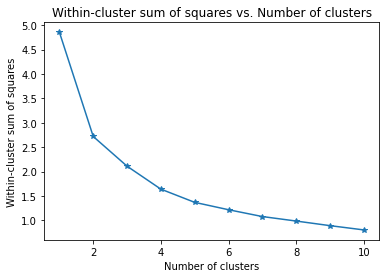

In [ ]:
plt.plot([i+1 for i in range(0, len(wcss))], wcss, marker='*')
plt.title('Within-cluster sum of squares vs. Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [ ]:
k_means_2 = KMeans(n_clusters=2, random_state=1).fit(X)
k_means_3 = KMeans(n_clusters=3, random_state=1).fit(X)
k_means_4 = KMeans(n_clusters=4, random_state=1).fit(X)

In [ ]:
k_means_2.labels_

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
k_means_3.labels_

array([1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1,
       1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1,
       2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2,

In [ ]:
h_clustering = AgglomerativeClustering(affinity='euclidean', linkage='complete').fit(X)

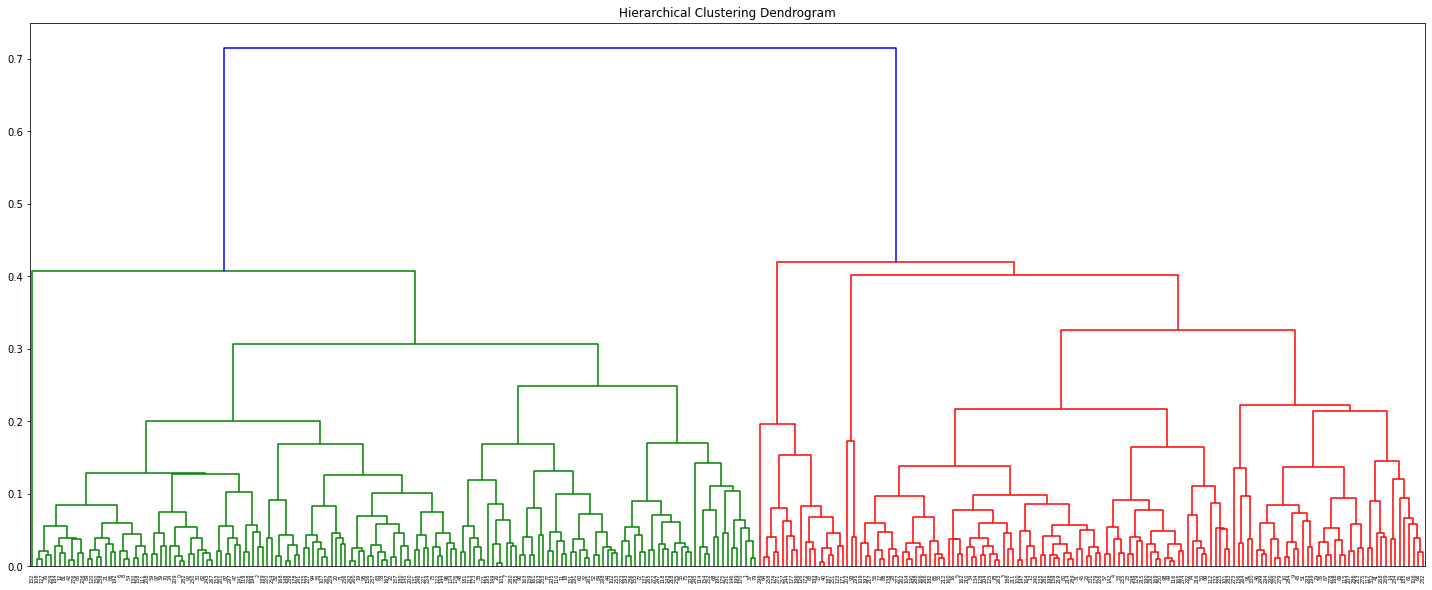

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'complete'))
plt.show()

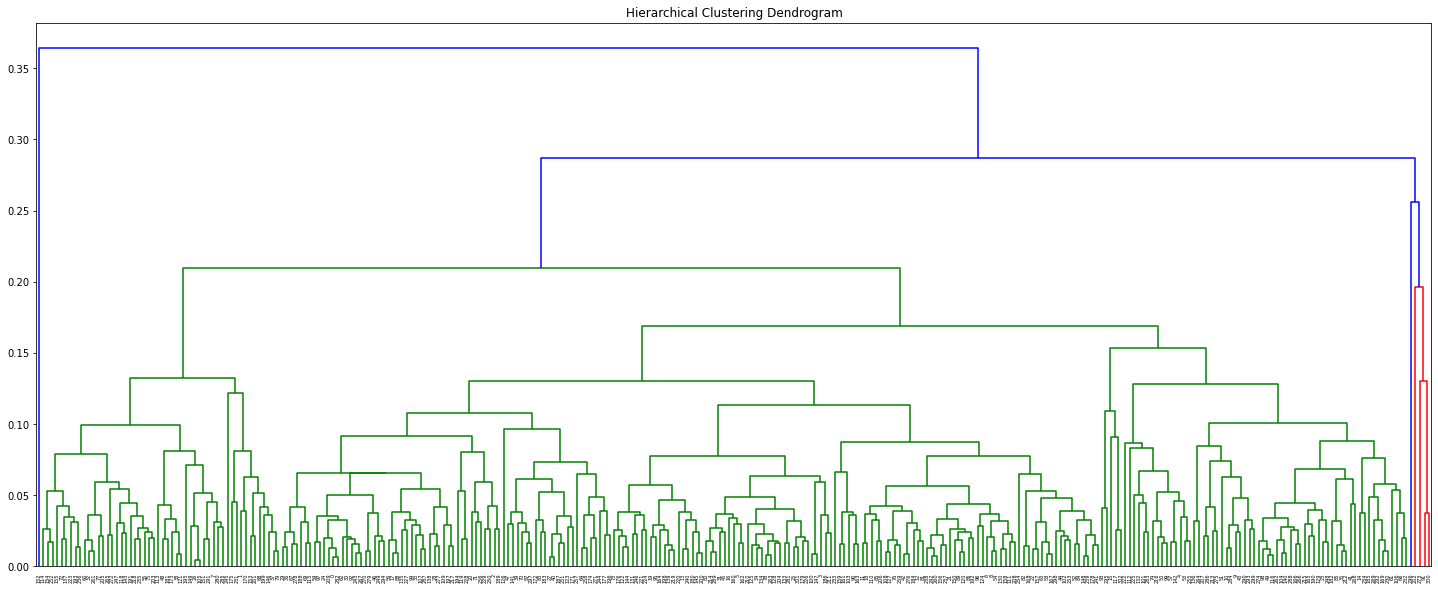

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'average'))
plt.show()

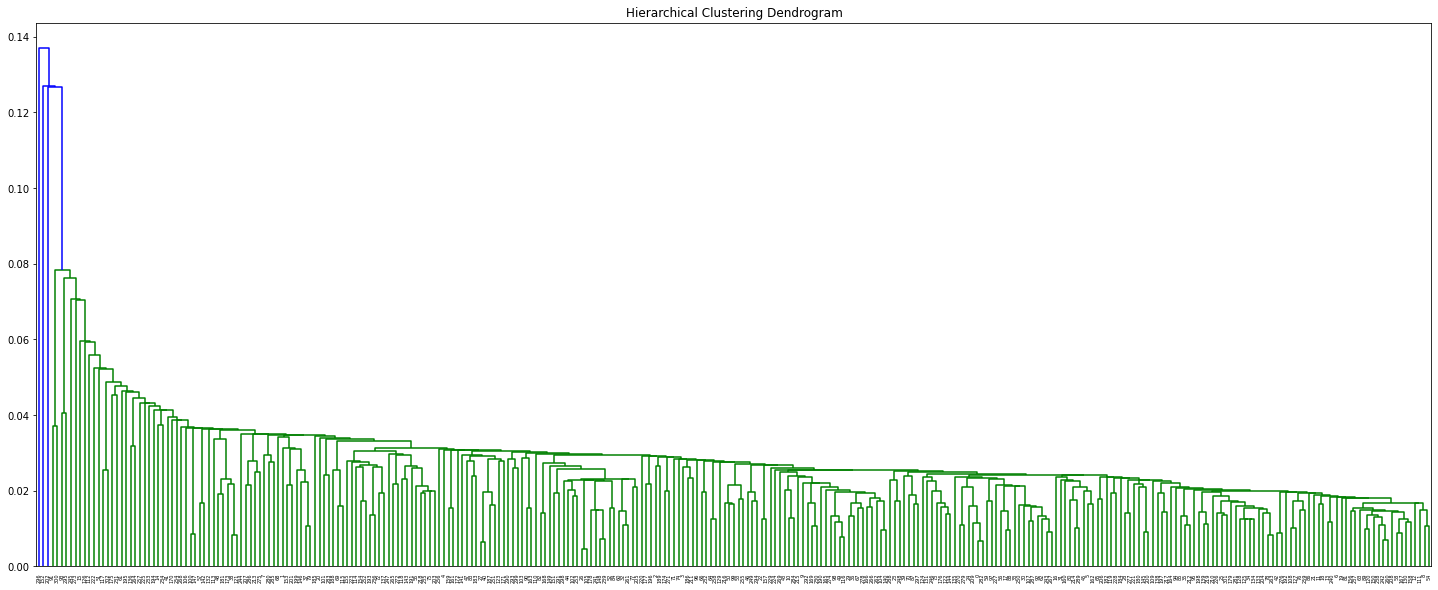

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'single'))
plt.show()

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


**KMeans 객체를 생성하고 군집화 수행**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

In [ ]:
print(kmeans.labels_)
print(kmeans.predict(irisDF))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [ ]:
irisDF['cluster']=kmeans.labels_

In [ ]:
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

** 2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


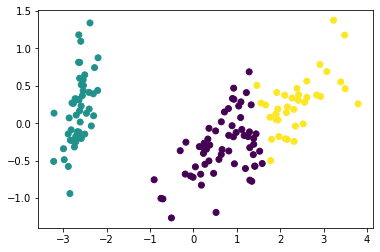

In [ ]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster']) 

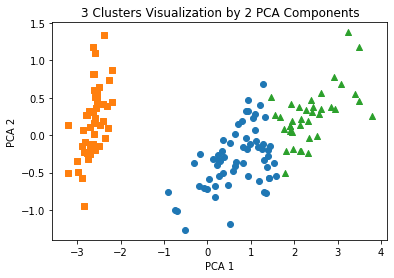

In [ ]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [ ]:
# 샘플수 100개 센터 4개 로 테스트해보기 

* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

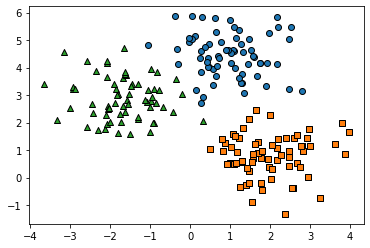

In [ ]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

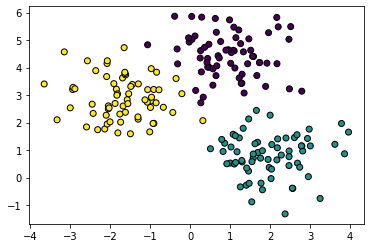

In [ ]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y )